# Save DICOM as a png file 

In [2]:
import pydicom
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [3]:
dcm = pydicom.dcmread("instance.dcm")

print(f"Modality: {dcm.Modality}")

Modality: CT


In [4]:
pixels = np.copy(dcm.pixel_array)
print(f"min: {np.min(pixels)}, max: {np.max(pixels)}")

min: -3024, max: 3071


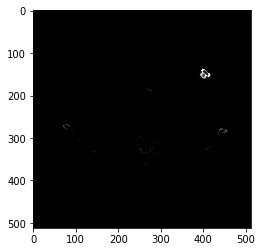

In [5]:
wc = 2472
ww = 4144

hu_min = wc - ww/2
hu_max = wc + ww/2

pixels[np.where(pixels < hu_min)] = hu_min
pixels[np.where(pixels > hu_max)] = hu_max
pixels = (pixels - hu_min)/(hu_max-hu_min)

plt.imshow(pixels, cmap="gray")

In [6]:
print(f"min: {np.min(pixels)}, max: {np.max(pixels)}")
out = (pixels*0xff).astype(np.uint8)
im = Image.fromarray(out, mode="L")
im.save("out.png")

min: 0.0, max: 0.644546332046332
